# <img style="float: left; padding-right: 20px; width: 200px" src="attachment:logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 02: Extracción y Revisión de Datos</center></h1>

Esta actividad busca aplicar lo que acabamos de ver en clases sobre extracción de datos y conectarlo con la materia de "Tipos de Datos" que hemos visto en las clases pasadas.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados a su repositorio personal, en una carpeta nueva llamada "Actividad 02". Asegúrese que ambas ayudantes tienen acceso a su repositorio para que puedan corregir. La actividad debe ser subida antes del final de la clase. Actualizaciones de su repositorio posteriores a esa fec</b>

Para esta actividad deben hacer lo siguiente:
<ol>
<li>Extraer datos</li>

Para esta actividad usaremos una base de datos de temblores que tiene la USGS (United States Geological Service) en https://www.usgs.gov/.

He preparado una base de datos con todos los temblores con magnitud mayor a 2.5, desde el 1ro de enero hasta el 23 de agosto de este año. La descripción de cada parámetro la pueden encontrar acá: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
    
Usando la librería `requests` descargue y guarde en un archivo en su repositorio local los datos que están disponibles en el siguiente URL:
    
`url='https://github.com/raxlab/imt2200-data/blob/main/actividades/actividad%2002/query.json?raw=true'`
    
<br>

<li>Formato</li>

¿En qué formato están los datos descargados? Identifique si son datos estructurados, semi-estructurados o no estructurados, explicando claramente por qué los categoriza así.
    
<br>
    
<li>DataFrame de análisis</li>

Usando los elementos que están bajo la categoría `features`, construya un DataFrame con los datos bajados y muestre parte de la tabla usando el método `.head()`.
    
<br>
    
<li>Preguntas</li>

Realice las dos siguientes actividades:

4.1 Profundidad:
    
Entre los tembroles que hay en la base, ¿Cuál fue el más profundo y qué profundidad tuvo? Sea claro en su respuesta.
    
4.2 Gráfico de intensidad:
    
Los temblores están medidos en diferfentes unidades a lo largo de los datos (puede ver la unidad en la columna `magType`), lo que no los hace a todos comparables. Elija un tipo de unidad (puede ser `me`, `mb`, `ml` u otro) y haga aun gráfico mostrando la intensidad de cada temblor a lo largo del tiempo.
    
No olvide poner nombres a los ejes y en el título ponga las unidades elegidas y guarde la imagen con el nombre: `temblores_APELLIDO.jpg` donde reemplace `APELLIDO` por su propio apellido.

El siguiente es un ejemplo usando las unidades `mw` para que use como guía, pero no es necesario que use las mismas unidades o que cambie los tipos de marcadores o líneas para que sean iguales a este ejemplo.
</ol>

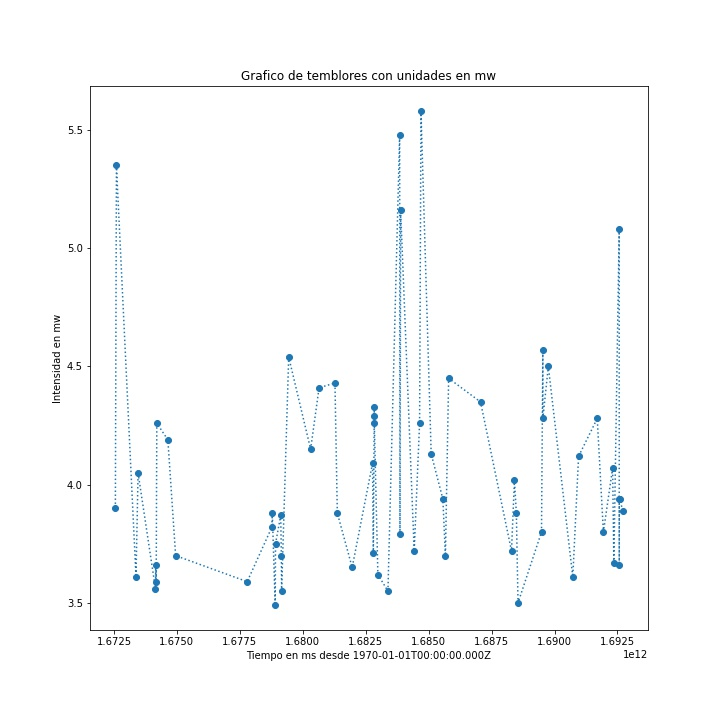

## Rúbrica

- Si han logrado los puntos 1 y 2: 3.0
- Si han logrado hasta el punto 3: 4.0
- Si han logrado hasta el punto 4, pero este último parcialmente: 5.0
- Si han logrado todo: 7.0

## 1. Extraer datos

In [192]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import requests
import json

In [193]:
# respuesta:
datos= requests.get('https://github.com/raxlab/imt2200-data/blob/main/actividades/actividad%2002/query.json?raw=true')
open("Datos_descargados.json",'wb').write(datos.content)
print("Archivo: Datos_descargados ha sido creado en formato json")



Archivo Datos_descargados ha sido creado en formato json


## 2. Formato

<b>Respuesta: Los datos son semi estructurados pues en clases vimos que los datos json son semi estructurados, pues esto no se encuentran organizados en tablas y permiten un ligera flexiblilidad al almacenar datos, "Semejante a un diccionario de Python".


## 3. DataFrame de Análisis

In [203]:
# respuesta:
datos = json.load(open('Datos_descargados.json', 'r', encoding='UTF-8'))
data = pd.json_normalize(datos['features'])
data = pd.DataFrame(data)
data.head()

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,ak023asu4hj0,2.90,"45 km NE of Ouzinkie, Alaska",1692791261378,1692793742040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.60,NaN,ml,earthquake,"M 2.9 - 45 km NE of Ouzinkie, Alaska",Point,"[-151.9232, 58.1926, 26.9]"
1,Feature,hv73539357,2.71,"3 km SSW of Pāhala, Hawaii",1692788510490,1692788854040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",47.0,NaN,0.14,91.0,ml,earthquake,"M 2.7 - 3 km SSW of Pāhala, Hawaii",Point,"[-155.4931640625, 19.1736660003662, 32.9300003..."
2,Feature,us7000kqau,4.30,"93 km NNW of Lae, Papua New Guinea",1692786843757,1692790548040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",22.0,3.49700,1.00,142.0,mb,earthquake,"M 4.3 - 93 km NNW of Lae, Papua New Guinea",Point,"[146.8111, -5.9021, 95.043]"
3,Feature,us7000kqap,4.70,"15 km E of Pulandian, China",1692785987446,1692791110513,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,8.0,...,",dyfi,origin,phase-data,",68.0,4.01500,0.46,57.0,mb,earthquake,"M 4.7 - 15 km E of Pulandian, China",Point,"[122.1398, 39.4117, 10]"
4,Feature,pr71421983,2.56,None,1692784919970,1692786039030,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",14.0,0.09577,0.33,135.0,md,earthquake,M 2.6 -,Point,"[-66.809, 18.044, 11.81]"


## 4. Preguntas

### 4.1 Profundidad

Los datos de profundidad se encuentran en el tercer elemento adentro del `key` llamado `coordinates` que está adentro del `key` llamado `geometry`. Una forma simple de acceder es transformar la columna `coordinates` a una lista de listas usando el comando `.values.tolist()` y luego crear un DataFrame con las listas obtenidas con el comando `pd.DataFrame(<data>, columns = ['lat', 'long', 'deep'])`. Con eso la columna `deep` tendrá la profundidad de cada evento, que si desean pueden agregar al DataFrame original.

In [195]:
coordenadas=data["geometry.coordinates"].values.tolist()
coor=pd.DataFrame(coordenadas, columns = ['lat', 'long', 'deep'])
coor

,lat,long,deep
0,-151.923200,58.192600,26.900
1,-155.493164,19.173666,32.930
2,146.811100,-5.902100,95.043
3,122.139800,39.411700,10.000
4,-66.809000,18.044000,11.810
...,...,...,...
16637,-66.525100,19.163100,24.000
16638,155.232000,-6.706500,35.000
16639,-115.200800,44.369500,10.000
16640,126.738000,7.139700,79.194


In [196]:
#ordenamospor profundidad los datos
df=pd.concat([data, coor],axis=1)

df.sort_values(by="deep", ascending =False).head(1)



,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates,lat,long,deep
9676,Feature,us6000k2db,4.0,"208 km ENE of Sola, Vanuatu",1680372557114,1685829981040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,0.53,61.0,mb,earthquake,"M 4.0 - 208 km ENE of Sola, Vanuatu",Point,"[169.3241, -13.1462, 681.238]",169.3241,-13.1462,681.238


RESPUESTA 4.1: el terremoto de id us6000k2db la mayor profundida (681.238 mts)

### 4.2 Grafico

Importante notar que el elemento `time` de cada medición está en milisegundos desde `1970-01-01T00:00:00.000Z`. No es necesario que transforme ese valor en una fecha, sólo use el tiempo directamente para el eje X de su gráfico. Ya aprenderemos a transformar este tipo de datos en otro formato.

In [201]:
#agrupar solos los temblores de magnitud tipo mww

nueva_tabla=pd.concat([data["properties.magType"], data["properties.mag"],data["properties.time"]],axis=1)
nueva_tabla

df = pd.DataFrame(nueva_tabla)
df=df[df['properties.magType']=='mww']
df

,properties.magType,properties.mag,properties.time
78,mww,5.2,1692612078434
88,mww,5.5,1692595452970
122,mww,5.7,1692561588864
152,mww,5.2,1692496134945
155,mww,5.4,1692486659410
...,...,...,...
16540,mww,5.3,1672644026985
16591,mww,5.8,1672597602628
16592,mww,5.5,1672597472306
16623,mww,5.2,1672556581860


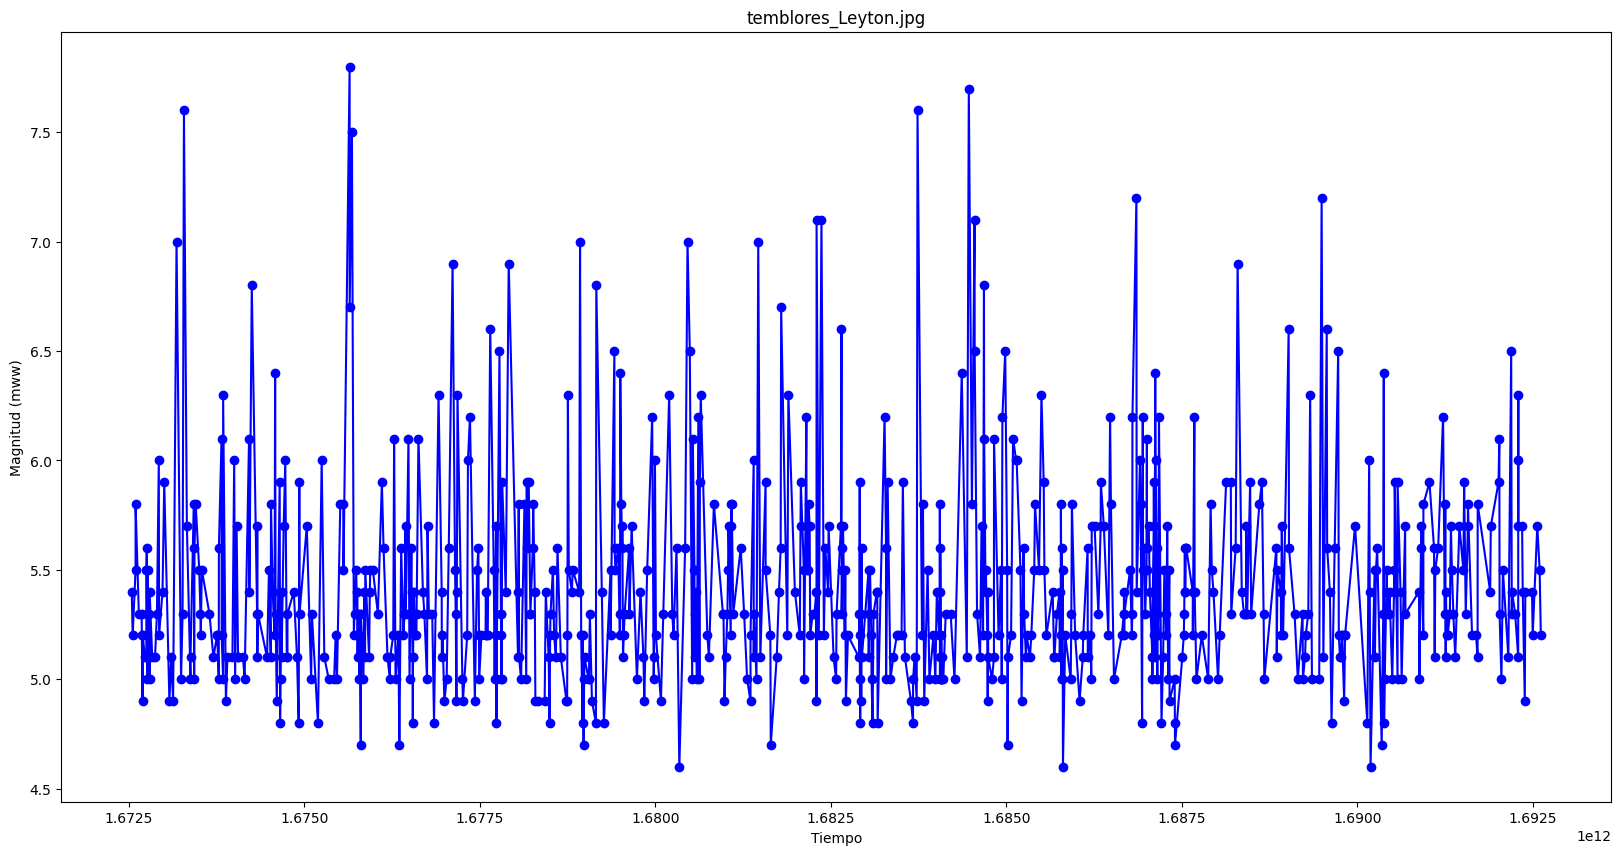

In [202]:
#mostrar grafico
fig = plt.figure(figsize=(20,10))
plt.plot(df["properties.time"], df["properties.mag"], 'bo-')

plt.title("temblores_Leyton.jpg")
plt.xlabel('Tiempo')
plt.ylabel('Magnitud (mww)')
plt.savefig("temblores_Leyton.jpg")
plt.show()
